In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.cm as cm
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from tabulate import tabulate
import tabulatehelper as th

In [2]:
pd.set_option('display.max_columns', 500)
data = pd.read_csv('../data/NBA_Players.csv')
data.describe()

,Year,Age,G,GS,MP,FG,FGA,FG_Prct,Three_P,Three_PA,Three_P_Prct,Two_P,Two_PA,Two_P_Prct,eFG_Prct,FT,FTA,FT_Prct,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Potw,APG_Leader,MVP,PPG_Leader,RPG_Leader,Rookie,WS_Leader,Salary
count,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9003.000000,9.003000e+03
mean,2006.010108,26.868155,53.490281,27.128291,21.151361,3.215628,7.148040,0.438690,0.534000,1.529435,0.235552,2.681317,5.618249,0.462392,0.473237,1.594135,2.130712,0.703569,1.030101,2.658947,3.686871,1.919549,0.684661,0.432289,1.251027,1.927680,8.557781,0.055315,0.001777,0.002555,0.002777,0.003110,0.002110,0.002666,3.742057e+06
std,8.408611,4.255849,25.004754,29.653462,10.158378,2.224859,4.707804,0.092061,0.664535,1.748895,0.177372,2.004793,3.998221,0.098789,0.094123,1.438236,1.808355,0.185351,0.866059,1.835543,2.569872,1.848659,0.467370,0.509850,0.812884,0.825047,6.052927,0.228607,0.042122,0.050482,0.052626,0.055684,0.045893,0.051565,4.756572e+06
min,1991.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03
25%,1999.000000,24.000000,33.000000,1.000000,12.700000,1.400000,3.400000,0.403000,0.000000,0.100000,0.000000,1.100000,2.500000,0.429000,0.442000,0.600000,0.800000,0.651500,0.400000,1.300000,1.800000,0.600000,0.300000,0.100000,0.600000,1.300000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.450000e+05
50%,2006.000000,26.000000,60.000000,13.000000,20.900000,2.700000,6.100000,0.442000,0.200000,0.900000,0.294000,2.200000,4.600000,0.469000,0.482000,1.200000,1.600000,0.747000,0.800000,2.300000,3.100000,1.300000,0.600000,0.300000,1.100000,1.900000,7.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.923000e+06
75%,2013.000000,30.000000,76.000000,54.000000,29.800000,4.600000,10.100000,0.482000,0.900000,2.600000,0.363000,3.800000,7.900000,0.506000,0.516000,2.200000,2.900000,0.813000,1.400000,3.500000,4.900000,2.600000,0.900000,0.500000,1.700000,2.500000,12.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.534710e+06
max,2019.000000,43.000000,82.000000,82.000000,43.700000,12.700000,27.800000,1.000000,5.100000,13.200000,1.000000,11.700000,23.400000,1.000000,1.500000,9.700000,11.700000,1.000000,5.900000,12.300000,18.300000,14.200000,3.000000,6.000000,5.700000,6.000000,36.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.745715e+07


Stats Dictionary:

Rk -- Rank
Pos -- Position
Age -- Age of Player at the start of February 1st of that season.
Tm -- Team
G -- Games
GS -- Games Started
MP -- Minutes Played Per Game
FG -- Field Goals Per Game
FGA -- Field Goal Attempts Per Game
FG% -- Field Goal Percentage
3P -- 3-Point Field Goals Per Game
3PA -- 3-Point Field Goal Attempts Per Game
3P% -- 3-Point Field Goal Percentage
2P -- 2-Point Field Goals Per Game
2PA -- 2-Point Field Goal Attempts Per Game
2P% -- 2-Point Field Goal Percentage
eFG% -- Effective Field Goal Percentage
This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
FT -- Free Throws Per Game
FTA -- Free Throw Attempts Per Game
FT% -- Free Throw Percentage
ORB -- Offensive Rebounds Per Game
DRB -- Defensive Rebounds Per Game
TRB -- Total Rebounds Per Game
AST -- Assists Per Game
STL -- Steals Per Game
BLK -- Blocks Per Game
TOV -- Turnovers Per Game
PF -- Personal Fouls Per Game
PTS -- Points Per Game


In [3]:
position = pd.get_dummies(data['Pos'], drop_first= True)
position.columns = 'Pos_' + position.columns
data2 = pd.concat([data, position], axis=1).drop(columns = ['Pos','TRB'])
features_stats = data2.drop(columns = ['Year','Player','Tm','Potw','APG_Leader','MVP','PPG_Leader','RPG_Leader','Rookie','WS_Leader','Salary'])
Potw = data2['Potw']
position.head()

,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,1,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,1,0


# Model Selection

## FULL MODEL

In [4]:
formula_1 = f'Potw ~ {" + ".join(list(features_stats.columns))}'
lm1 = smf.glm(formula_1, data = data2,family=sm.families.Binomial()).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                            GLM   Df Residuals:                     8973
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -796.00
Date:                Sun, 13 Oct 2019   Deviance:                       1592.0
Time:                        02:08:50   Pearson chi2:                 5.98e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.0533      2.202     -3.204      0.001     -11.368      -2.738
Age              0.0037      0.019      0.192      0.848      -0.034       0.041
G                0.0235      0.008      3.018      0.003       0.008       0.039
GS               0.0106      0.006      1.654      0.098      -0.002       0.023
MP              -0.0574      0.029     -1.996      0.046      -0.114      -0.001
FG               5.4060      2.123      2.546      0.011       1.245       9.567
FGA             -2.0274      1.347     -1.505      0.132      -4.667       0.612
FG_Prct         10.7732     11.362      0.948      0.343     -11.495      33.042
Three_P         -2.9811      1.901     -1.568      0.117      -6.707       0.745
Three_PA         1.9828      1.355      1.463      0.143      -0.673       4.639
Three_P_Prct    -0.7730      0.674     -1.147      0.252      -2.094       0.548
Two_P           -3.2803      1.530     -2.144      0.032      -6.279      -0.282
Two_PA           1.6402      1.353      1.212      0.225      -1.011       4.292
Two_P_Prct     -10.7823      4.834     -2.231      0.026     -20.256      -1.309
eFG_Prct        -4.6058      8.387     -0.549      0.583     -21.043      11.832
FT               1.1940      0.947      1.261      0.207      -0.662       3.050
FTA             -0.3099      0.276     -1.122      0.262      -0.851       0.231
FT_Prct         -0.9466      1.745     -0.542      0.588      -4.367       2.474
ORB             -0.0279      0.133     -0.209      0.834      -0.289       0.233
DRB              0.3841      0.067      5.692      0.000       0.252       0.516
AST              0.2203      0.065      3.375      0.001       0.092       0.348
STL              0.4287      0.192      2.229      0.026       0.052       0.806
BLK              0.5137      0.143      3.596      0.000       0.234       0.794
TOV             -0.0824      0.175     -0.470      0.638      -0.426       0.261
PF              -0.3444      0.147     -2.346      0.019      -0.632      -0.057
PTS             -0.3675      0.902     -0.407      0.684      -2.136       1.401
Pos_PF          -0.3807      0.258     -1.475      0.140      -0.887       0.125
Pos_PG           0.6144      0.467      1.316      0.188      -0.301       1.529
Pos_SF          -0.4112      0.355     -1.158      0.247      -1.107       0.285
Pos_SG           0.1630      0.406      0.401      0.688      -0.633       0.959
================================================================================
"""

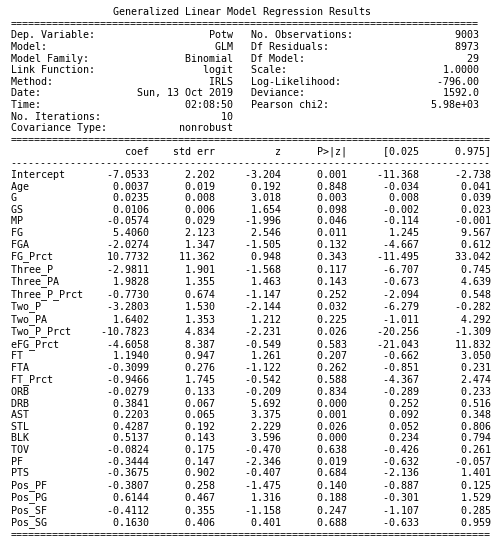

In [5]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm1.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model1.png', dpi = 300, bbox_inches = 'tight')

## Use VIF to remove correlated predictors -- Multicollinearity

In [6]:
#Try to do VIF for the full model
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(features_stats.values, i) for i in range(features_stats.shape[1])]
vif['Features'] = features_stats.columns
print(th.md_table(vif, formats = {-1: 'c'}))

|   VIF Factor | Features     |
|-------------:|:------------:|
|     26.0211  | Age          |
|     11.3482  | G            |
|      6.7615  | GS           |
|     83.4158  | MP           |
|  17012       | FG           |
|  34424.3     | FGA          |
|    954.273   | FG_Prct      |
|    686.854   | Three_P      |
|   2536.17    | Three_PA     |
|      6.35287 | Three_P_Prct |
|   6836.73    | Two_P        |
|  22445.9     | Two_PA       |
|    169.023   | Two_P_Prct   |
|    785.512   | eFG_Prct     |
|    979.946   | FT           |
|    128.659   | FTA          |
|     25.7676  | FT_Prct      |
|     11.9941  | ORB          |
|     18.7982  | DRB          |
|     12.4838  | AST          |
|     10.2294  | STL          |
|      3.98979 | BLK          |
|     25.5512  | TOV          |
|     20.8393  | PF           |
|  21427.7     | PTS          |
|      2.34968 | Pos_PF       |
|      4.97383 | Pos_PG       |
|      3.15486 | Pos_SF       |
|      4.05631 | Pos_SG       |


In [7]:
# A function to remove a variable with max VIF for each VIF test, until all the remaining variables with VIF < 10.

def rm_var(df):
    while True:
        vif = pd.DataFrame()
        vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        max_vif_value = vif["VIF Factor"].max()
        if max_vif_value > 10:
            rm_var_name = vif.loc[vif["VIF Factor"] == max_vif_value,'features'].values[0]
            df.drop(columns=[rm_var_name], inplace = True)
            continue
        else:
            break
    return df.columns,vif

In [8]:
left_var = rm_var(features_stats)[0]
vif = rm_var(features_stats)[1]
print(th.md_table(vif, formats = {-1: 'c'}))

|   VIF Factor | features     |
|-------------:|:------------:|
|      7.95085 | G            |
|      4.94142 | GS           |
|      3.43524 | Three_P      |
|      4.71419 | Three_P_Prct |
|      5.18055 | FT           |
|      6.44495 | ORB          |
|      8.28762 | AST          |
|      9.34177 | STL          |
|      3.26413 | BLK          |
|      1.82872 | Pos_PF       |
|      3.3308  | Pos_PG       |
|      2.08894 | Pos_SF       |
|      2.45765 | Pos_SG       |


## REDUCED MODEL

In [9]:
# Remaining predictors
features_stats_2 = features_stats[left_var]
features_stats_2.head()

,G,GS,Three_P,Three_P_Prct,FT,ORB,AST,STL,BLK,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,43,0,0.0,0.000,0.6,0.6,0.3,0.1,0.3,1,0,0,0
1,67,19,0.4,0.240,1.3,0.5,3.1,0.8,0.1,0,1,0,0
2,68,0,0.0,0.333,1.0,2.1,0.4,0.4,0.4,0,0,0,0
3,66,66,2.5,0.296,7.0,0.9,10.5,2.2,0.1,0,1,0,0
4,78,13,0.3,0.308,3.1,1.7,1.8,0.6,0.3,0,0,1,0


In [10]:
formula_2 = f'Potw ~ {" + ".join(list(left_var))}'
lm2 = smf.glm(formula_2, data = data2,family=sm.families.Binomial()).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                            GLM   Df Residuals:                     8989
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -898.51
Date:                Sun, 13 Oct 2019   Deviance:                       1797.0
Time:                        02:08:54   Pearson chi2:                 5.77e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -9.0605      0.510    -17.760      0.000     -10.060      -8.061
G                0.0078      0.008      1.038      0.299      -0.007       0.023
GS               0.0249      0.006      4.169      0.000       0.013       0.037
Three_P          0.6198      0.104      5.939      0.000       0.415       0.824
Three_P_Prct    -0.0596      0.599     -0.100      0.921      -1.233       1.114
FT               0.7744      0.045     17.153      0.000       0.686       0.863
ORB              0.2540      0.105      2.409      0.016       0.047       0.461
AST              0.3190      0.050      6.408      0.000       0.221       0.417
STL              0.3780      0.168      2.244      0.025       0.048       0.708
BLK              0.6229      0.122      5.119      0.000       0.384       0.861
Pos_PF          -0.3535      0.219     -1.616      0.106      -0.782       0.075
Pos_PG          -1.0769      0.373     -2.887      0.004      -1.808      -0.346
Pos_SF          -1.0006      0.288     -3.473      0.001      -1.565      -0.436
Pos_SG          -0.9127      0.311     -2.931      0.003      -1.523      -0.302
================================================================================
"""

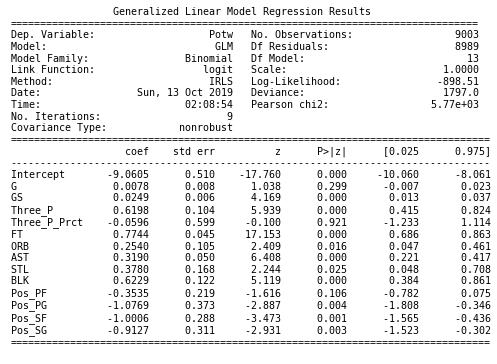

In [11]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm2.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model2.png', dpi = 300, bbox_inches = 'tight')

## Deviance Test - First Time

In [12]:
delta_G = lm2.deviance - lm1.deviance
df_for_chi = len(lm1.params) - len(lm2.params)
# on significant level = 0.5, chi-square statistics
chi2_stat = stats.chi2.ppf(0.95, df_for_chi)
print(delta_G)
print(chi2_stat)
if delta_G > chi2_stat:
    print(f'{delta_G} > {chi2_stat}\nTherefore, we could reject null hypothesis on significant level of 0.05 and choose reduced model')

205.00795782822092
26.29622760486423
205.00795782822092 > 26.29622760486423
Therefore, we could reject null hypothesis on significant level of 0.05 and choose reduced model


## Continue to remove variables based on Wald Test with alpha = 0.05

In [13]:
# remove variable: Three_P_Prct
left_var2 = left_var.drop('Three_P_Prct')
left_var2
formula_3 = f'Potw ~ {" + ".join(list(left_var2))}'
lm3 = smf.glm(formula_3, data = data2,family=sm.families.Binomial()).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                            GLM   Df Residuals:                     8990
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -898.51
Date:                Sun, 13 Oct 2019   Deviance:                       1797.0
Time:                        02:08:55   Pearson chi2:                 5.79e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0722      0.497    -18.268      0.000     -10.046      -8.099
G              0.0078      0.008      1.036      0.300      -0.007       0.023
GS             0.0249      0.006      4.169      0.000       0.013       0.037
Three_P        0.6159      0.096      6.385      0.000       0.427       0.805
FT             0.7742      0.045     17.181      0.000       0.686       0.862
ORB            0.2561      0.103      2.477      0.013       0.053       0.459
AST            0.3187      0.050      6.412      0.000       0.221       0.416
STL            0.3772      0.168      2.242      0.025       0.047       0.707
BLK            0.6240      0.121      5.147      0.000       0.386       0.862
Pos_PF        -0.3556      0.218     -1.634      0.102      -0.782       0.071
Pos_PG        -1.0760      0.373     -2.886      0.004      -1.807      -0.345
Pos_SF        -1.0021      0.288     -3.483      0.000      -1.566      -0.438
Pos_SG        -0.9130      0.311     -2.932      0.003      -1.523      -0.303
==============================================================================
"""

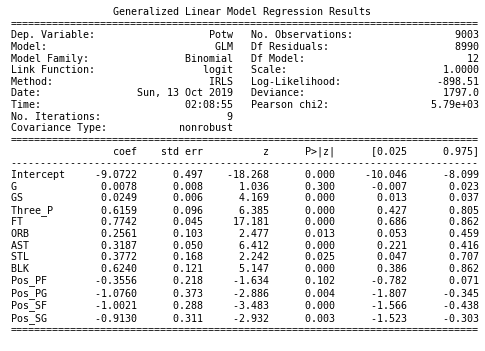

In [14]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm3.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model3.png', dpi = 300, bbox_inches = 'tight')

In [15]:
# remove variable: G
left_var3 = left_var2.drop('G')
left_var3
formula_4 = f'Potw ~ {" + ".join(list(left_var3))}'
lm4 = smf.glm(formula_4, data = data2,family=sm.families.Binomial()).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                            GLM   Df Residuals:                     8991
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -899.03
Date:                Sun, 13 Oct 2019   Deviance:                       1798.1
Time:                        02:08:55   Pearson chi2:                 6.29e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7719      0.394    -22.292      0.000      -9.543      -8.001
GS             0.0299      0.004      8.052      0.000       0.023       0.037
Three_P        0.6028      0.095      6.328      0.000       0.416       0.790
FT             0.7656      0.044     17.381      0.000       0.679       0.852
ORB            0.2477      0.103      2.413      0.016       0.047       0.449
AST            0.3124      0.049      6.361      0.000       0.216       0.409
STL            0.3713      0.167      2.219      0.026       0.043       0.699
BLK            0.6167      0.121      5.108      0.000       0.380       0.853
Pos_PF        -0.3446      0.217     -1.587      0.113      -0.770       0.081
Pos_PG        -1.0538      0.372     -2.834      0.005      -1.782      -0.325
Pos_SF        -0.9930      0.287     -3.458      0.001      -1.556      -0.430
Pos_SG        -0.8968      0.310     -2.889      0.004      -1.505      -0.288
==============================================================================
"""

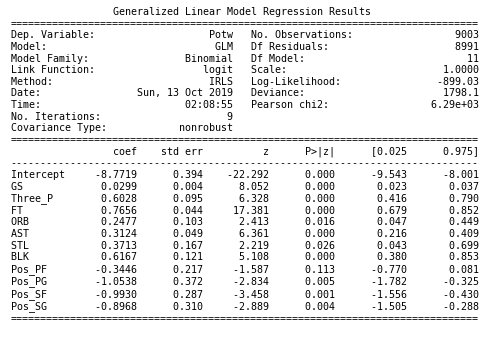

In [16]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm4.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model4.png', dpi = 300, bbox_inches = 'tight')

In [17]:
# since Pos_PF is not significant, we are planning to drop the categotical variable: Position
left_var4 = left_var3[:-4]
left_var4
formula_5 = f'Potw ~ {" + ".join(list(left_var4))}'
lm5 = smf.glm(formula_5, data = data2,family=sm.families.Binomial()).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                            GLM   Df Residuals:                     8995
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -905.52
Date:                Sun, 13 Oct 2019   Deviance:                       1811.0
Time:                        02:08:56   Pearson chi2:                 7.58e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.4281      0.348    -27.129      0.000     -10.109      -8.747
GS             0.0300      0.004      8.138      0.000       0.023       0.037
Three_P        0.5576      0.093      5.972      0.000       0.375       0.741
FT             0.7583      0.042     18.224      0.000       0.677       0.840
ORB            0.3866      0.092      4.209      0.000       0.207       0.567
AST            0.2881      0.036      7.963      0.000       0.217       0.359
STL            0.1997      0.155      1.286      0.199      -0.105       0.504
BLK            0.7805      0.109      7.193      0.000       0.568       0.993
==============================================================================
"""

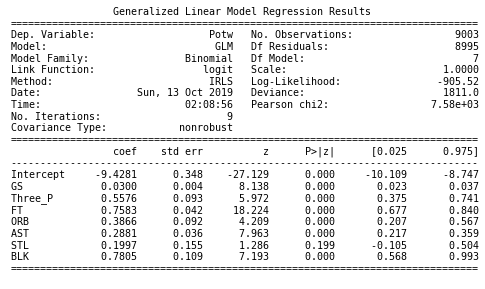

In [18]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm5.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model5.png', dpi = 300, bbox_inches = 'tight')

In [19]:
# remove variable: STL
left_var5 = left_var4.drop('STL')
left_var5
formula_6 = f'Potw ~ {" + ".join(list(left_var5))}'
lm6 = smf.glm(formula_6, data = data2,family=sm.families.Binomial()).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 9003
Model:                            GLM   Df Residuals:                     8996
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -906.34
Date:                Sun, 13 Oct 2019   Deviance:                       1812.7
Time:                        02:08:57   Pearson chi2:                 7.39e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3541      0.342    -27.384      0.000     -10.024      -8.685
GS             0.0305      0.004      8.345      0.000       0.023       0.038
Three_P        0.5689      0.093      6.119      0.000       0.387       0.751
FT             0.7631      0.041     18.420      0.000       0.682       0.844
ORB            0.3935      0.092      4.295      0.000       0.214       0.573
AST            0.3106      0.032      9.827      0.000       0.249       0.373
BLK            0.7785      0.108      7.196      0.000       0.566       0.990
==============================================================================
"""

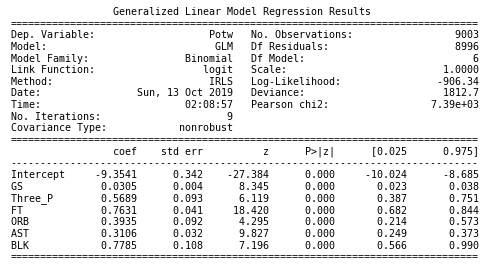

In [20]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm6.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model6.png', dpi = 300, bbox_inches = 'tight')

**So far, here is the most reduced model**

## Deviance Test - Second Time

In [21]:
delta_G_2 = lm6.deviance - lm2.deviance
df_for_chi_2 = len(lm2.params) - len(lm6.params)
# on significant level = 0.5, chi-square statistics
chi2_stat_2 = stats.chi2.ppf(0.95, df_for_chi_2)
print(delta_G_2)
print(chi2_stat_2)
if delta_G_2 > chi2_stat_2:
    print(f'{delta_G_2} > {chi2_stat_2}')
    print('Therefore, we could reject null hypothesis on significant level of 0.05 and choose reduced model')

15.668202293957393
14.067140449340169
15.668202293957393 > 14.067140449340169
Therefore, we could reject null hypothesis on significant level of 0.05 and choose reduced model


# Model Diagnosis

## Pearson residuals -- Test Heteroscedasticity

In [22]:
ei = lm6.resid_pearson
prd = lm6.fittedvalues

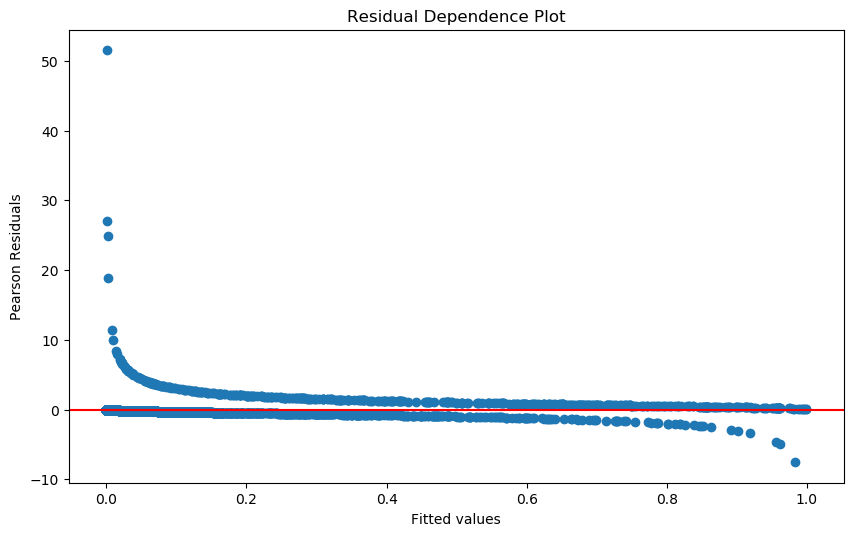

In [23]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(prd, ei)
plt.ylabel("Pearson Residuals")
plt.xlabel("Fitted values")
plt.title("Residual Dependence Plot")
plt.axhline(y=0, color = 'r')
plt.savefig('../plot/regression_1_residual.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### High Leverage Observations & Influential Points

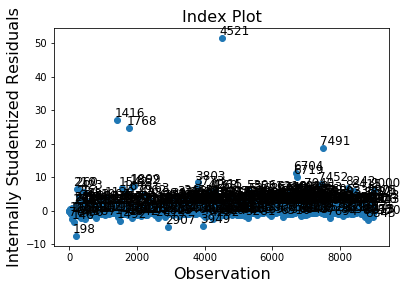

In [24]:
# Plot Abnormal Residual
infl = lm6.get_influence(observed=False)
fig = infl.plot_index(y_var='resid', threshold=1)
plt.savefig('../plot/regression_1_influence.png', dpi = 300, bbox_inches = 'tight')

In [25]:
summ_df = infl.summary_frame()
top_hii = summ_df.sort_values('hat_diag', ascending=False)[:10].index
summ_df.sort_values('hat_diag', ascending=False)[:10]

,dfb_Intercept,dfb_GS,dfb_Three_P,dfb_FT,dfb_ORB,dfb_AST,dfb_BLK,cooks_d,standard_resid,hat_diag,dffits_internal
8717,-0.037080,-0.011744,0.111919,-0.011015,0.039759,0.008436,0.018531,0.001897,0.694630,0.026779,0.115225
5101,-0.031700,0.105399,0.005090,-0.035957,-0.001118,-0.072400,-0.024332,0.002437,-0.807659,0.025484,-0.130608
1497,-0.015973,-0.001296,0.013597,-0.008390,-0.021890,0.012921,0.103030,0.001761,0.702613,0.024361,0.111026
2742,-0.007859,0.038387,-0.006640,-0.021159,-0.042304,-0.000333,0.034090,0.000604,-0.433953,0.021962,-0.065027
169,0.018494,0.060469,-0.038209,0.004914,-0.015609,-0.049947,-0.142683,0.004399,-1.208267,0.020659,-0.175487
4074,-0.012032,0.080292,-0.024146,-0.032232,0.040185,-0.031766,-0.150136,0.004294,-1.210166,0.020111,-0.173368
980,-0.021803,0.010261,0.013243,-0.013319,-0.016279,0.010917,0.097187,0.001724,0.767254,0.020087,0.109852
8217,-0.005233,0.016676,-0.008135,0.008986,0.001077,-0.008469,-0.027378,0.000162,-0.249008,0.017987,-0.033700
4837,0.012149,-0.007312,-0.008231,0.033887,0.016975,-0.025196,-0.090043,0.001534,-0.769216,0.017827,-0.103632
543,-0.064306,0.011112,0.044095,-0.023808,0.189241,0.024725,-0.116421,0.006255,1.554181,0.017803,0.209244


In [26]:
lm6_n = lm6.nobs
lm6_p = len(lm6.params)
hiis = summ_df[['hat_diag']]
hiis_threshold = 3*lm6_p/lm6_n
hiis_index = hiis.loc[hiis.hat_diag > hiis_threshold].index

In [27]:
# Influential Points -- diffits
lm6_n = lm6.nobs
lm6_p = len(lm6.params)
diffits = summ_df[['dffits_internal']]
diffits_threshold = 2*(((lm6_p+1)/(lm6_n-lm6_p-1))**0.5)
diffits_index = diffits.loc[diffits.dffits_internal > diffits_threshold].index
# Influential Points -- cook's distance
cooks_d = summ_df[['cooks_d']]
cooks_d_threshold = 4/(lm6_n - lm6_p)
cooks_d_index = cooks_d.loc[cooks_d.cooks_d > cooks_d_threshold].index

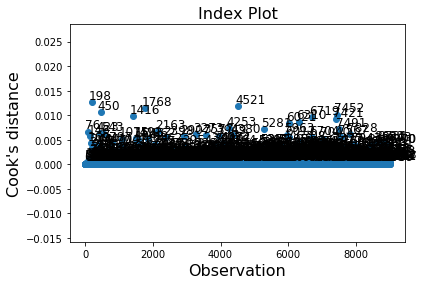

In [28]:
fig = infl.plot_index(y_var='cooks', threshold=2 * infl.cooks_distance[0].mean())
plt.savefig('../plot/regression_1_cooks.png', dpi = 300, bbox_inches = 'tight')

In [29]:
infl_points = (diffits_index & cooks_d_index)
infl_points

Int64Index([  99,  193,  210,  215,  216,  219,  240,  260,  284,  357,
            ...
            8731, 8763, 8783, 8840, 8875, 8876, 8901, 8942, 8943, 9000],
           dtype='int64', length=307)

In [30]:
top_res = summ_df.loc[abs(summ_df.standard_resid)>3]
top_res.sort_values('standard_resid', ascending=True)

,dfb_Intercept,dfb_GS,dfb_Three_P,dfb_FT,dfb_ORB,dfb_AST,dfb_BLK,cooks_d,standard_resid,hat_diag,dffits_internal
198,0.136989,-0.001208,-0.042978,-0.121853,-0.011034,-0.053069,-0.218445,0.012713,-7.542077,0.001562,-0.298308
2907,0.097548,-0.021254,-0.061750,-0.167076,0.005396,0.009603,-0.022481,0.005774,-5.002874,0.001612,-0.201039
3949,0.087198,0.035736,-0.071205,-0.159882,-0.022012,-0.035502,-0.033201,0.005691,-4.701291,0.001799,-0.199593
146,0.070791,-0.035508,0.054159,-0.167464,-0.023523,0.021338,0.041748,0.005739,-3.373163,0.003518,-0.200435
1492,0.056192,0.012637,0.003645,-0.117273,0.018494,-0.001846,-0.118524,0.005309,-3.037520,0.004012,-0.192786
...,...,...,...,...,...,...,...,...,...,...,...
6704,0.146237,-0.144939,0.035962,-0.076799,-0.011644,0.007242,-0.005088,0.005512,11.370149,0.000298,0.196436
7491,0.182955,-0.163546,0.011777,-0.096481,-0.016664,0.002243,-0.019784,0.007143,18.869753,0.000140,0.223613
1768,0.188627,-0.204980,0.112153,-0.108212,0.028545,-0.048887,-0.006838,0.011498,24.832987,0.000130,0.283699
1416,0.233960,-0.201540,-0.057774,-0.047661,-0.017395,-0.059037,-0.037621,0.009790,27.073297,0.000093,0.261783


In [31]:
top_diffits = summ_df.sort_values('dffits_internal', ascending=False)[:10].index
top_cooksd = summ_df.sort_values('cooks_d', ascending=False)[:10].index
dele_ob = (infl_points & top_res.index)
dele_ob

Int64Index([ 210,  260,  284,  423, 1004, 1120, 1416, 1542, 1678, 1768, 1862,
            1899, 2062, 2163, 2398, 3083, 3263, 3455, 3635, 3773, 3803, 4033,
            4100, 4142, 4168, 4264, 4298, 4315, 4324, 4521, 4787, 5006, 5138,
            5214, 5272, 5306, 5368, 5531, 5607, 6001, 6021, 6210, 6220, 6270,
            6283, 6308, 6481, 6536, 6586, 6600, 6704, 6719, 6808, 6839, 6946,
            7040, 7057, 7073, 7088, 7120, 7253, 7375, 7452, 7491, 7606, 8033,
            8242, 8415, 8783, 8875, 8901, 9000],
           dtype='int64')

In [32]:
pd.set_option('display.max_columns', 500)
data.iloc[dele_ob,:]

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG_Prct,Three_P,Three_PA,Three_P_Prct,Two_P,Two_PA,Two_P_Prct,eFG_Prct,FT,FTA,FT_Prct,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Potw,APG_Leader,MVP,PPG_Leader,RPG_Leader,Rookie,WS_Leader,Salary
210,1991,Dennis Scott,SG,22.0,ORL,82,73,28.5,6.1,14.4,0.425,1.5,4.1,0.374,4.6,10.4,0.445,0.478,1.9,2.5,0.750,0.8,2.1,2.9,1.6,0.8,0.3,1.5,2.5,15.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1560000
260,1991,Gerald Wilkins,SG,27.0,NYK,68,56,31.8,5.6,11.8,0.473,0.1,0.6,0.209,5.5,11.2,0.488,0.478,2.5,3.0,0.820,1.1,1.9,3.0,4.0,1.2,0.3,2.4,2.7,13.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,725000
284,1992,Nick Anderson,SG,24.0,ORL,60,59,36.7,8.0,17.4,0.463,0.5,1.4,0.353,7.5,16.0,0.472,0.477,3.4,5.1,0.667,1.6,4.8,6.4,2.7,1.6,0.6,2.1,2.2,19.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,750000
423,1992,Jeff Malone,SG,30.0,UTA,81,81,36.1,8.5,16.7,0.511,0.0,0.1,0.083,8.5,16.6,0.515,0.511,3.2,3.5,0.898,0.6,2.3,2.9,2.2,0.7,0.1,1.7,1.6,20.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1580000
1004,1994,Glen Rice,SF,26.0,MIA,81,81,37.0,8.2,17.5,0.467,1.6,4.3,0.382,6.6,13.3,0.494,0.513,3.1,3.5,0.880,0.9,4.4,5.4,2.3,1.4,0.4,1.6,2.3,21.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8415,2018,Tobias Harris,PF,25.0,DET,48,48,32.6,6.7,14.8,0.451,2.4,5.8,0.409,4.3,9.0,0.478,0.531,2.4,2.8,0.846,0.8,4.3,5.1,2.0,0.7,0.3,1.1,1.9,18.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16000000
8783,2019,Tobias Harris,PF,26.0,LAC,55,55,34.6,7.7,15.5,0.496,2.0,4.7,0.434,5.7,10.9,0.523,0.561,3.5,4.0,0.877,0.7,7.2,7.9,2.7,0.7,0.4,2.0,2.2,20.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14800000
8875,2019,Paul Millsap,PF,33.0,DEN,70,65,27.1,4.6,9.5,0.484,0.8,2.3,0.365,3.8,7.2,0.522,0.528,2.6,3.6,0.727,2.2,5.0,7.2,2.0,1.2,0.8,1.4,2.6,12.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,29730769
8901,2019,Victor Oladipo,SG,26.0,IND,36,36,31.9,6.9,16.3,0.423,2.1,6.0,0.343,4.9,10.3,0.470,0.486,2.9,3.9,0.730,0.6,5.0,5.6,5.2,1.7,0.3,2.3,2.0,18.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21000000


## Rebuild Model: Final Model

In [33]:
data3 = data2.drop(dele_ob).reset_index(drop = True)
lm7 = smf.glm(formula_6, data = data3,family=sm.families.Binomial()).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Potw   No. Observations:                 8931
Model:                            GLM   Df Residuals:                     8924
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -639.71
Date:                Sun, 13 Oct 2019   Deviance:                       1279.4
Time:                        02:09:07   Pearson chi2:                 1.80e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.5808      0.569    -22.103      0.000     -13.696     -11.465
GS             0.0463      0.005      8.542      0.000       0.036       0.057
Three_P        0.7539      0.110      6.832      0.000       0.538       0.970
FT             0.9424      0.051     18.383      0.000       0.842       1.043
ORB            0.5363      0.110      4.895      0.000       0.322       0.751
AST            0.4182      0.038     11.057      0.000       0.344       0.492
BLK            1.0625      0.127      8.336      0.000       0.813       1.312
==============================================================================
"""

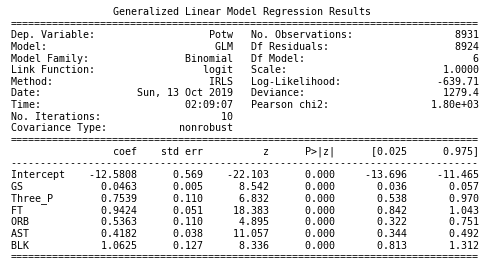

In [34]:
plt.rc('figure')
plt.text(0.01, 0.05, str(lm7.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.savefig('../plot/regression_1_summary_model7.png', dpi = 300, bbox_inches = 'tight')

## final model analysis

In [35]:
## Compare aic and bic of all models
model_lst = [lm2,lm3,lm4,lm5,lm6,lm7]
aic_bic = pd.DataFrame()
aic_bic['Model'] = ['lm' + str(i) for i in range(2,8)]
aic_bic['aic'] = [i.aic for i in model_lst]
aic_bic['bic'] = [i.bic for i in model_lst]
print(th.md_table(aic_bic, formats = {-1: 'c'}))

| Model   |     aic |      bic |
|:--------|--------:|:--------:|
| lm2     | 1825.01 | -80050.6 |
| lm3     | 1823.02 | -80059.7 |
| lm4     | 1822.06 | -80067.8 |
| lm5     | 1827.04 | -80091.3 |
| lm6     | 1826.68 | -80098.7 |
| lm7     | 1293.43 | -79904.7 |


In [36]:
## vif - detect Multicollinearity
prd_data = data3[lm7.params.index.drop('Intercept')]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(prd_data.values, i) for i in range(prd_data.shape[1])]
vif['Features'] = prd_data.columns
print(th.md_table(vif, formats = {-1: 'c'}))

|   VIF Factor | Features   |
|-------------:|:----------:|
|      4.13226 | GS         |
|      2.20517 | Three_P    |
|      4.88634 | FT         |
|      4.30992 | ORB        |
|      3.68579 | AST        |
|      3.08643 | BLK        |


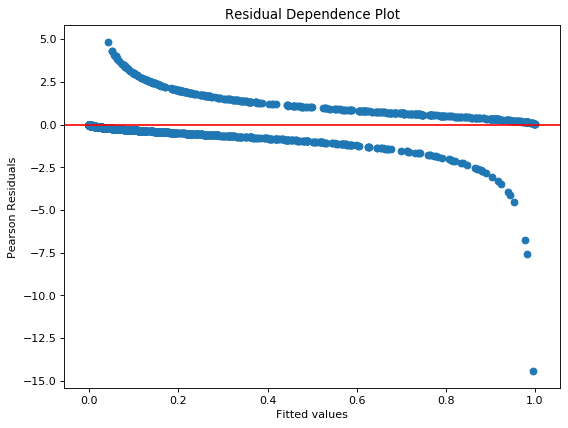

In [37]:
## residuals plot - detect Heteroscedasticity
ei = lm7.resid_pearson
prd = lm7.fittedvalues
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(prd, ei)
plt.ylabel("Pearson Residuals")
plt.xlabel("Fitted values")
plt.title("Residual Dependence Plot")
plt.axhline(y=0, color = 'r')
plt.savefig('../plot/regression_1_final_residual.png', dpi = 300, bbox_inches = 'tight')
plt.show()

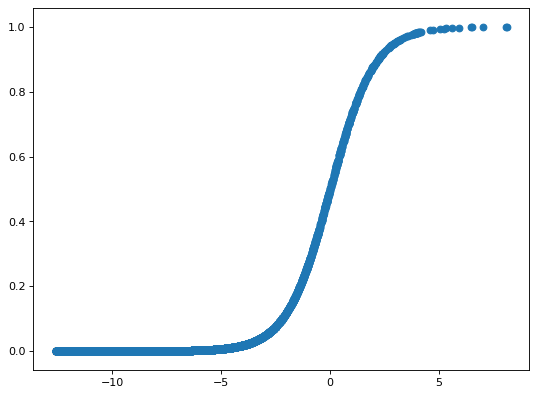

In [38]:
# plot how pi changes with the model
pi = prd
odds = pi / (1-pi)
yi = np.log(odds)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(yi,pi)
plt.savefig('../plot/regression_1_pi.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [39]:
# table for exp(beta_i)
import math
beta = pd.DataFrame([[math.exp(par) for par in lm7.params]], columns = list(lm7.params.index))
print(th.md_table(beta, formats = {-1: 'c'}))

|   Intercept |      GS |   Three_P |      FT |     ORB |     AST |     BLK |
|------------:|--------:|----------:|--------:|--------:|--------:|:-------:|
|  3.4373e-06 | 1.04734 |    2.1252 | 2.56605 | 1.70975 | 1.51926 | 2.89362 |
